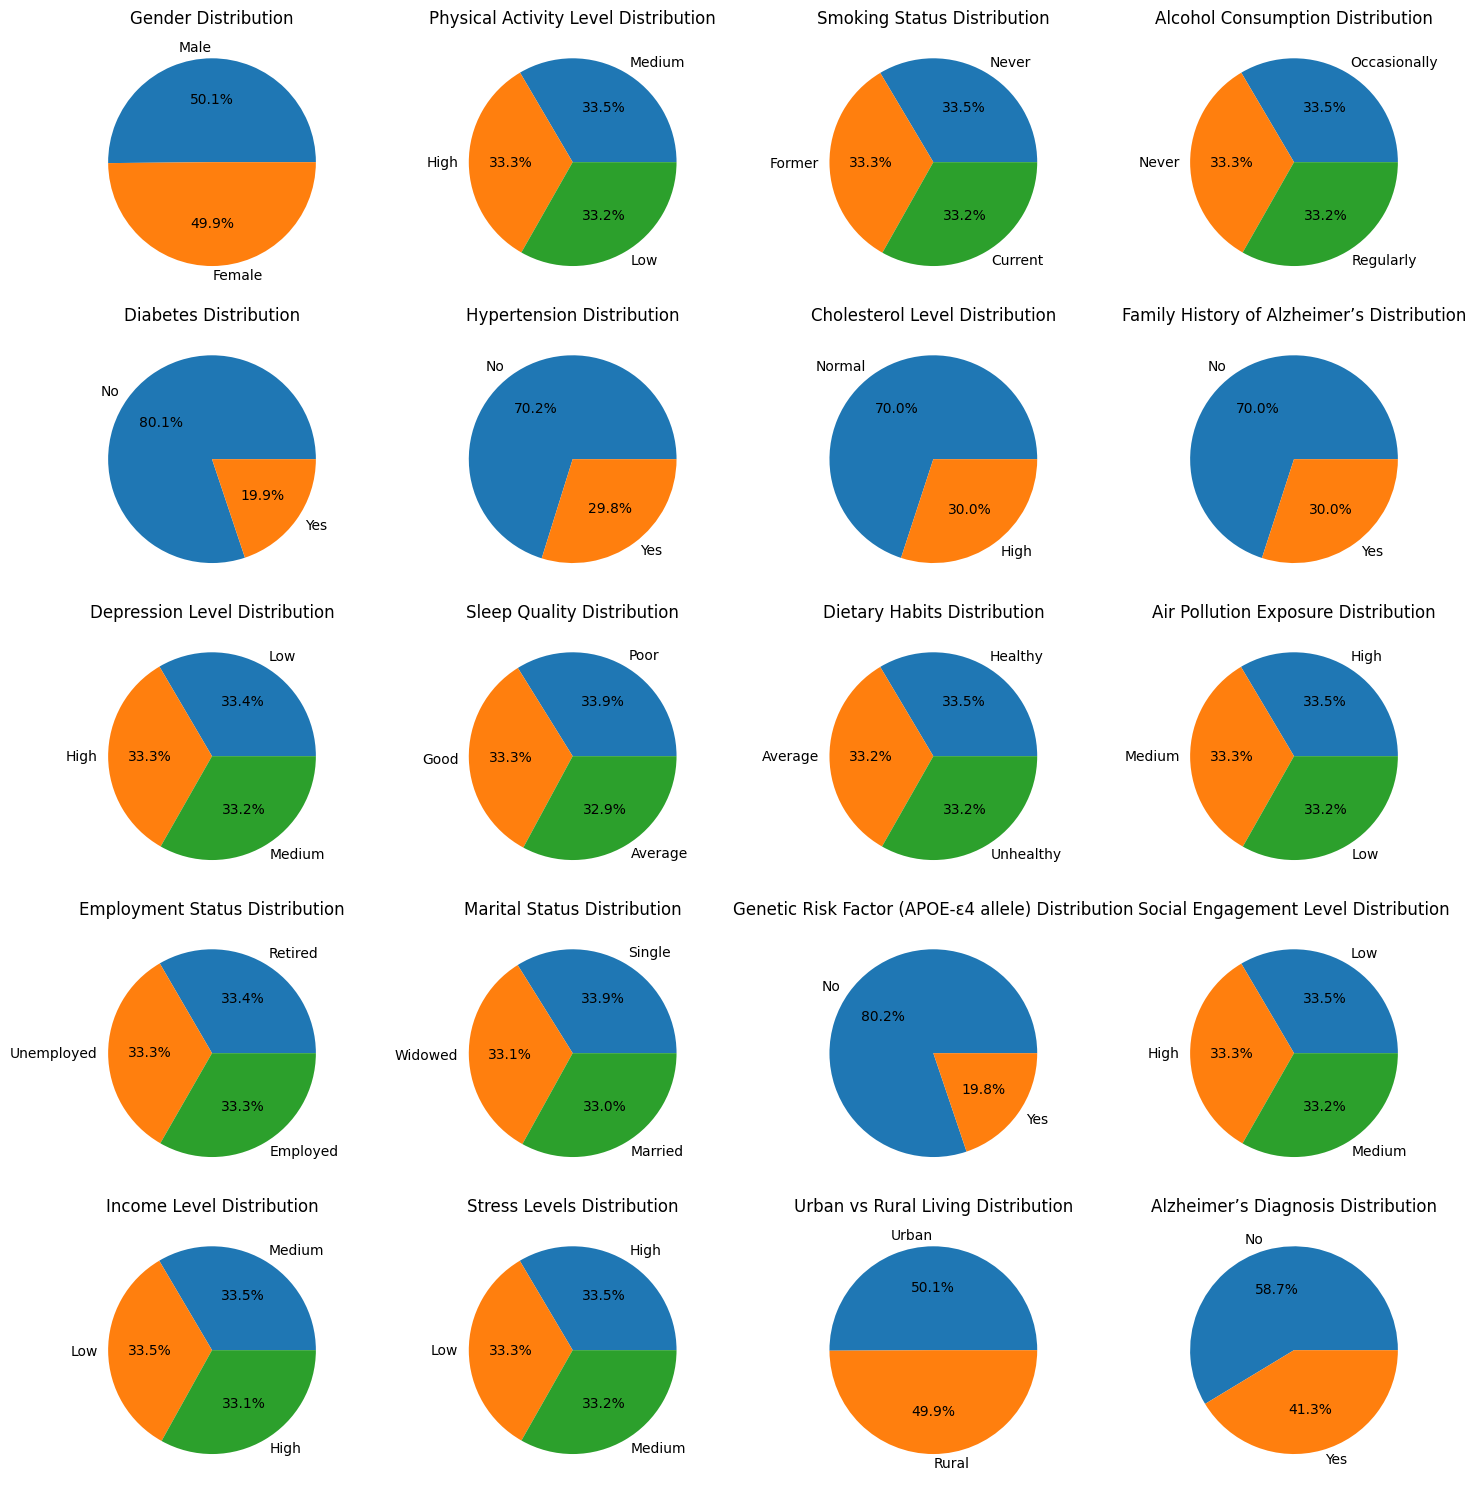

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


dataset = pd.read_csv('alzheimers_prediction_dataset.csv')
dataset = dataset.drop(columns = ['Country'])

mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'Physical Activity Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Smoking Status': {'Never': 0, 'Former': 1, 'Current': 2},
    'Alcohol Consumption': {'Never': 0, 'Occasionally': 1, 'Regularly': 2},
    'Diabetes': {'No': 0, 'Yes': 1},
    'Hypertension': {'No': 0, 'Yes': 1},
    'Cholesterol Level': {'Normal': 0, 'High': 1},
    'Family History of Alzheimer’s': {'No': 0, 'Yes': 1},
    'Depression Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Sleep Quality': {'Poor': 0, 'Average': 1, 'Good': 2},
    'Dietary Habits': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2},
    'Air Pollution Exposure': {'Low': 0, 'Medium': 1, 'High': 2},
    'Employment Status': {'Retired': 0, 'Unemployed': 1, 'Employed': 2},
    'Marital Status': {'Widowed': 0, 'Married': 1, 'Single': 2},
    'Genetic Risk Factor (APOE-ε4 allele)': {'No': 0, 'Yes': 1},
    'Social Engagement Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Income Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Stress Levels': {'Low': 0, 'Medium': 1, 'High': 2},
    'Urban vs Rural Living': {'Urban': 0, 'Rural': 1},
    'Alzheimer’s Diagnosis': {'No': 0, 'Yes': 1}
}

for column, mapping in mappings.items():
    dataset[column] = dataset[column].map(mapping)

reverse_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Physical Activity Level': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Smoking Status': {0: 'Never', 1: 'Former', 2: 'Current'},
    'Alcohol Consumption': {0: 'Never', 1: 'Occasionally', 2: 'Regularly'},
    'Diabetes': {0: 'No', 1: 'Yes'},
    'Hypertension': {0: 'No', 1: 'Yes'},
    'Cholesterol Level': {0: 'Normal', 1: 'High'},
    'Family History of Alzheimer’s': {0: 'No', 1: 'Yes'},
    'Depression Level': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Sleep Quality': {0: 'Poor', 1: 'Average', 2: 'Good'},
    'Dietary Habits': {0: 'Unhealthy', 1: 'Average', 2: 'Healthy'},
    'Air Pollution Exposure': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Employment Status': {0: 'Retired', 1: 'Unemployed', 2: 'Employed'},
    'Marital Status': {0: 'Widowed', 1: 'Married', 2: 'Single'},
    'Genetic Risk Factor (APOE-ε4 allele)': {0: 'No', 1: 'Yes'},
    'Social Engagement Level': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Income Level': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Stress Levels': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Urban vs Rural Living': {0: 'Urban', 1: 'Rural'},
    'Alzheimer’s Diagnosis': {0: 'No', 1: 'Yes'}
}

fig, axes = plt.subplots(5, 4, figsize=(15, 15))
for i, (column, mapping) in enumerate(mappings.items()):
    row, col = divmod(i, 4)
    axes[row, col].pie(
        dataset[column].value_counts(), 
        labels=[reverse_mappings[column][val] for val in dataset[column].unique()], 
        autopct='%1.1f%%'
    )
    axes[row, col].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()




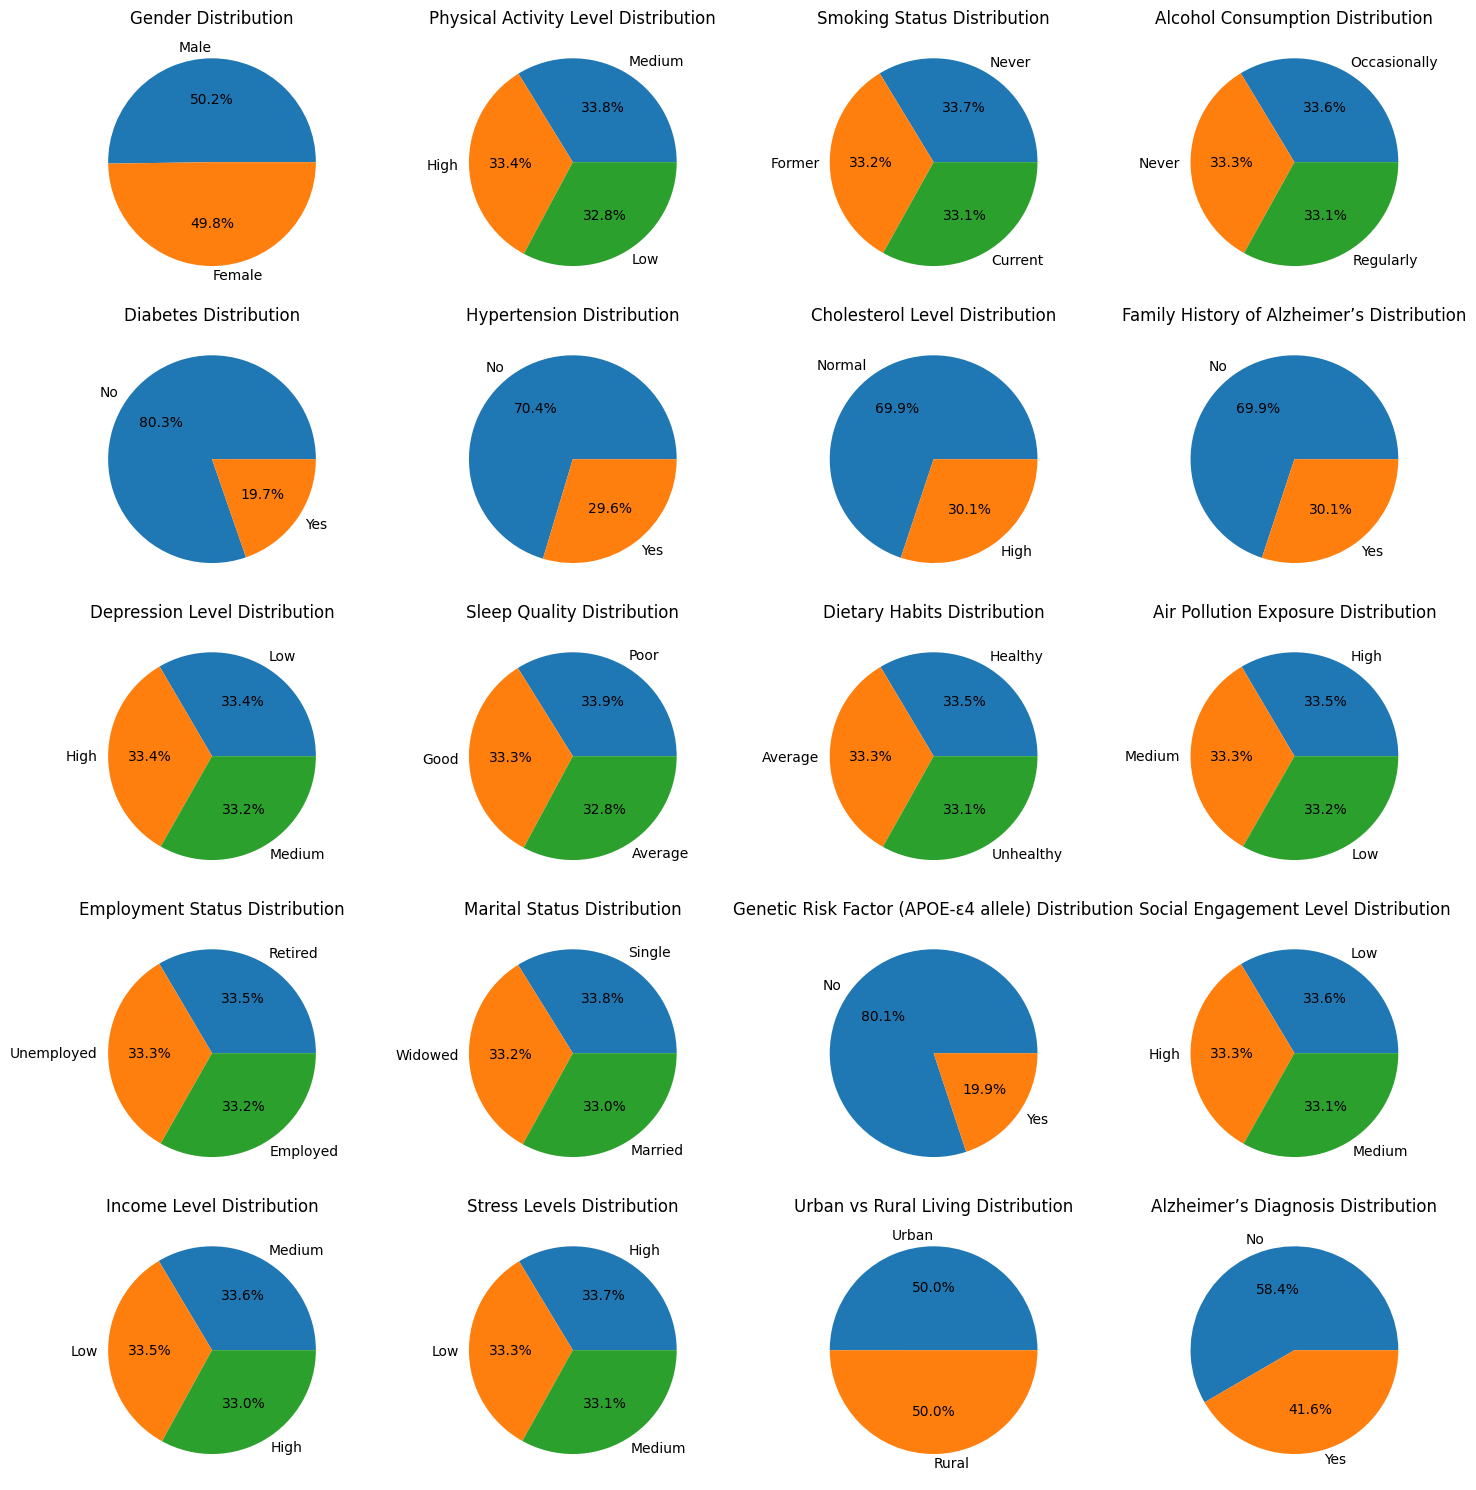

In [33]:
X = dataset.drop(columns=['Alzheimer’s Diagnosis']) 
y = dataset['Alzheimer’s Diagnosis']  
split_percentage = 0.7
rows = len(dataset)
split_index = int(rows * split_percentage)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

fig, axes = plt.subplots(5, 4, figsize=(15, 15))
for i, (column, mapping) in enumerate(mappings.items()):
    row, col = divmod(i, 4)
    if column == 'Alzheimer’s Diagnosis':
        axes[row, col].pie(
            y_train.value_counts(), 
            labels=['No','Yes'], 
            autopct='%1.1f%%'
        )
        axes[row, col].set_title('Alzheimer’s Diagnosis Distribution')
        break
    axes[row, col].pie(
        X_train[column].value_counts(), 
        labels=[reverse_mappings[column][val] for val in X_train[column].unique()], 
        autopct='%1.1f%%'
    )
    axes[row, col].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()




Epoch 1/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6688 - loss: 0.6516
Epoch 2/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6974 - loss: 0.5721
Epoch 3/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7032 - loss: 0.5661
Epoch 4/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7024 - loss: 0.5646
Epoch 5/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7066 - loss: 0.5584
Epoch 6/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7104 - loss: 0.5555
Epoch 7/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7128 - loss: 0.5508
Epoch 8/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7125 - loss: 0.5538
Epoch 9/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7139 - loss: 0.5492
Epoch 10/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7203 - loss: 0.5470
Epoch 11/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7151 - loss: 0.5482
Epoch 12/60
5200/5200 ━━━━━━━

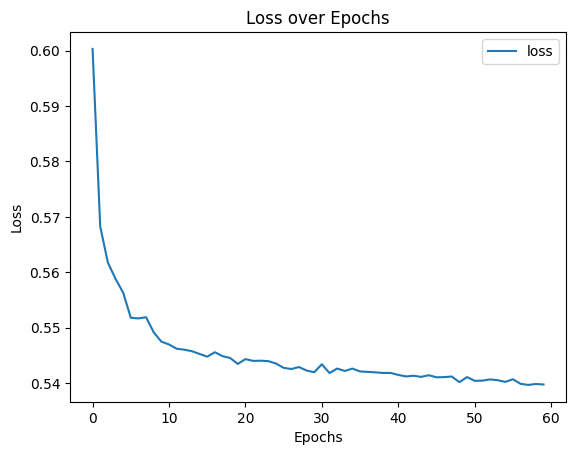

Accuracy: 71.66


In [44]:
model = Sequential()
model.add(Input(shape=(23,)))
model.add(Dense(256, activation= 'selu'))
model.add(Dense(128, activation = 'selu'))
model.add(Dense(64, activation = 'selu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(X_train, y_train, epochs=60, batch_size=10)  
_, accuracy = model.evaluate(X_train, y_train)  

plt.plot(training_history.history['loss'], label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()
print('Accuracy: %.2f' % (accuracy*100))

In [45]:
predictions = (model.predict(X_test) > 0.5).astype(int)

print("0 = No, 1 = Yes")
for i in range(0,len(X_test)):  
    print('Row %d => %d (expected %d)' % (i, predictions[i], y_test.iloc[i]))  
loss, accuracy = model.evaluate(X_test, y_test) 
print("Loss: %.2f" % (loss*100))
print("Accuracy: %.2f" % (accuracy*100))


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step
0 = No, 1 = Yes
Row 0 => 0 (expected 0)
Row 1 => 1 (expected 0)
Row 2 => 1 (expected 0)
Row 3 => 0 (expected 0)
Row 4 => 1 (expected 0)
Row 5 => 1 (expected 1)
Row 6 => 1 (expected 1)
Row 7 => 0 (expected 0)
Row 8 => 1 (expected 1)
Row 9 => 1 (expected 0)
Row 10 => 1 (expected 0)
Row 11 => 0 (expected 0)
Row 12 => 1 (expected 0)
Row 13 => 1 (expected 1)
Row 14 => 0 (expected 0)
Row 15 => 0 (expected 1)
Row 16 => 1 (expected 1)
Row 17 => 1 (expected 1)
Row 18 => 1 (expected 1)
Row 19 => 0 (expected 0)
Row 20 => 0 (expected 0)
Row 21 => 0 (expected 0)
Row 22 => 1 (expected 1)
Row 23 => 0 (expected 0)
Row 24 => 1 (expected 0)
Row 25 => 0 (expected 1)
Row 26 => 0 (expected 0)
Row 27 => 0 (expected 0)
Row 28 => 0 (expected 1)
Row 29 => 0 (expected 0)
Row 30 => 0 (expected 1)
Row 31 => 1 (expected 1)
Row 32 => 1 (expected 1)
Row 33 => 0 (expected 1)
Row 34 => 0 (expected 0)
Row 35 => 0 (expected 1)
Row 36 => 0 (expected 0)
Row 37 => 0 (expected 0)
R

C:\Temp\ipykernel_17904\4282993290.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Row %d => %d (expected %d)' % (i, predictions[i], y_test.iloc[i]))


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7087 - loss: 0.5509
Loss: 54.98
Accuracy: 71.21
